# Global Terrorism Database Bayesian Analysis

In [2]:
import pandas as pd
#df = pd.read_csv('../../../terror.csv')
df = pd.read_csv('terror.csv')

/Users/Ikekram/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,61,62,66,116,117,123) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,0,0,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
# selecting only attacks that are bombings (attack type #3)
df = df[df.attacktype1 == 3]


# EDA

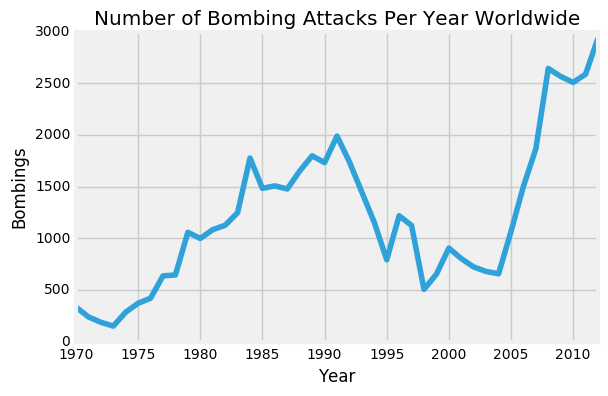

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

df.groupby('iyear').region.count().plot()
plt.xlabel('Year')
plt.ylabel('Bombings')
plt.title('Number of Bombing Attacks Per Year Worldwide')

In [11]:
#splitting each region into it's own dataframe

df1 = df[df.region == 1] # North America
df2 = df[df.region == 2] # Central America & Caribbean
df3 = df[df.region == 3] # South America
df4 = df[df.region == 4] # East Asia
df5 = df[df.region == 5] # Southeast Asia
df6 = df[df.region == 6] # South Asia
df7 = df[df.region == 7] # Central Asia
df8 = df[df.region == 8] # Western Europe
df9 = df[df.region == 9] # Eastern Europe
df10 = df[df.region == 10] # Middle East & North Africa
df11 = df[df.region == 11] #Sub-Saharan Africa
df12 = df[df.region == 12] #Austraasia & Oceania


In [40]:
df70s.targtype1_txt.describe()

count          974
unique          21
top       Business
freq           367
Name: targtype1_txt, dtype: object

In [41]:
# Counts of all types of targets in the 1970s
df70s.targtype1_txt.value_counts()

Business                          367
Government (General)              131
Military                           73
Police                             69
Government (Diplomatic)            69
Private Citizens & Property        66
Educational Institution            58
Utilities                          53
Airports & Aircraft                19
Journalists & Media                14
Religious Figures/Institutions     11
Transportation                      8
Unknown                             7
Telecommunication                   6
NGO                                 5
Maritime                            5
Tourists                            5
Food or Water Supply                4
Abortion Related                    2
Terrorists/Non-State Militia        1
Violent Political Party             1
Name: targtype1_txt, dtype: int64

Businesses were the top targets in the 70s

In [43]:
# counts of top targets in the 70s
df70s.target1.value_counts().head()

Bank of America             12
bank                         9
department store             9
Pacific Gas and Electric     8
Bank                         8
Name: target1, dtype: int64

In [44]:
# terrorist organization attack counts
df70s.gname.value_counts().head()

Unknown                                          175
Fuerzas Armadas de Liberacion Nacional (FALN)    101
Left-Wing Militants                               93
New World Liberation Front (NWLF)                 78
Weather Underground, Weathermen                   41
Name: gname, dtype: int64

In [45]:
# counts of motives for attacks
df70s.motive.value_counts()

Unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     41
To leverage the US government to free political prisoners                                                                                                                                                                                                                                                                                                                                                                                                                                                

# PRIOR IS 1970-1979 IN AMERICA. POSTERIOR IS 1980-1989 CALI AND NY.

Using a Bayesian anaylsis, I am going to determine if there is a statistically significant difference between the terror attacks in California and New York. This will help me determine if they are of the same population of attacks.

In [54]:
#df170 = df1[df1.iyear == 1970]

In [39]:
#creating a dataframe of 1970-1979
df70s = df1[(df1.iyear >= 1970)]
df70s = df70s[(df70s.iyear < 1980)]

In [207]:
df70s

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
10,197001050001,1970,1,1,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
17,197001120001,1970,1,12,NaN,0,NaN,217,United States,1,...,"One half hour after the bomb explosion, an ano...","""Blast Damages Flatbush School,"" New York Time...","Linda Greenhouse, ""Madison School Puzzled By B...",Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9,NaN
18,197001120002,1970,1,12,NaN,0,NaN,217,United States,1,...,NaN,Committee on the Judiciary United States Sena...,"""Toward People's War for Independence and Soci...",NaN,Hewitt Project,-9,-9,0,-9,NaN
22,197001190002,1970,1,19,NaN,0,NaN,217,United States,1,...,Witnesses observed three African American male...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Seattle University, ""1965-1975: Troubled Times...",Hewitt Project,-9,-9,0,-9,NaN
23,197001190003,1970,1,19,NaN,0,NaN,217,United States,1,...,Judith and Silas Bissell were both members of ...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Earl Caldwell, ""Fear Grows In Seattle As Polic...",Hewitt Project,-9,-9,0,-9,NaN
28,197001220002,1970,1,22,NaN,0,NaN,217,United States,1,...,This attack might be linked with other episode...,Committee on Government Operations United Stat...,"""Beef Plant Workers in Nebraska Await Call to ...",NaN,Hewitt Project,-9,-9,0,-9,NaN
31,197001260001,1970,1,26,NaN,0,NaN,217,United States,1,...,"Police, at the time, suspected that this attac...","""Miss. City Is Desegregation Trouble Spot,"" Ch...","""Black, White Killings in South, West Trigger ...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
35,197001280002,1970,1,28,NaN,0,NaN,217,United States,1,...,NaN,Committee on Government Operations United Stat...,"""Synagogue Blasted,"" Tri City Herald, January ...",NaN,Hewitt Project,-9,-9,0,-9,NaN
36,197001300001,1970,1,30,NaN,0,NaN,217,United States,1,...,This incident might be part of a multiple atta...,Committee on Government Operations United Stat...,"""Beef Plant Workers in Nebraska Await Call to ...",NaN,Hewitt Project,-9,-9,0,-9,197001300002


In [213]:
#New York and California are responsible for the largest amount of attacks
df70 = df70s.groupby('provstate').provstate.count()
print df70

provstate
Alabama                   2
Alaska                    1
Arizona                   4
California              266
Colorado                 18
Connecticut               2
District of Columbia     32
Florida                  52
Georgia                   3
Idaho                     1
Illinois                 44
Indiana                   1
Iowa                      9
Kansas                    3
Kentucky                  1
Louisiana                 6
Maine                     2
Maryland                  6
Massachusetts            19
Michigan                  8
Minnesota                 5
Mississippi               2
Missouri                 11
Montana                   1
Nebraska                 11
Nevada                    1
New Hampshire             2
New Jersey               10
New Mexico                1
New York                206
North Carolina            4
Ohio                     12
Oregon                    9
Pennsylvania              4
Puerto Rico              95
Rhode Isla

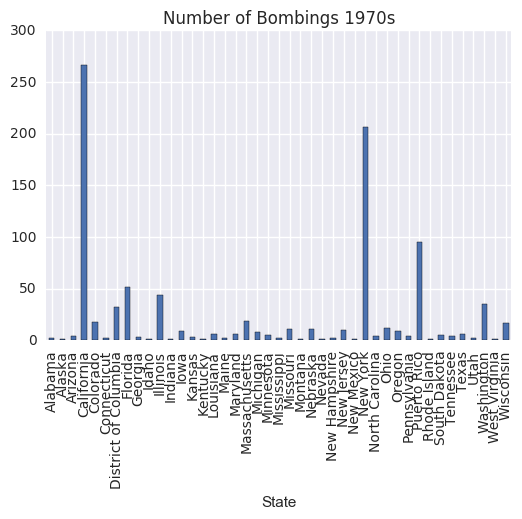

In [256]:
df70s.groupby('provstate').provstate.count().plot(kind='bar')
plt.xlabel('State')
plt.title('Number of Bombings 1970s')

In [209]:
# 974 terror attacks in the US during the 70s
df70s.iyear.count()

974

In [215]:
# creating a dataframe of 1980-1989
df80s = df1[(df1.iyear >= 1980)]
df80s = df80s[(df80s.iyear < 1990)]

In [ ]:
df80s.groupby('provstate').provstate.count()

In [217]:
dfNY = df80s[df80s.provstate == 'New York']
dfCA = df80s[df80s.provstate == 'California']

In [218]:
dfNY1 = dfNY.groupby('iyear').count()
dfCA1 = dfCA.groupby('iyear').count()

In [219]:
dfNY1.eventid

iyear
1980     6
1981    12
1982    22
1983     6
1984     7
1985     7
1986     3
Name: eventid, dtype: int64

# 

In [220]:
import pymc3 as pm #importing Bayesian modeling package
#settup up the prior being average terror attacks in all states across America
mean_prior_mean = df70.mean() #average of all terror attacks in US states per month
mean_prior_std = df70.std() #std of avg attacks per month of each state

In [221]:
##creating normal distributions to take the overall mean and stdev of terror in the US
with pm.Model() as model:

    NY_mean = pm.Normal('NYork_mean', mean_prior_mean, sd=mean_prior_std)
    CA_mean = pm.Normal('Cali_mean', mean_prior_mean, sd=mean_prior_std)

In [222]:
std_prior_lower = 0.01
std_prior_upper = 10.0

with model:
    
    NY_std = pm.Uniform('NYork_std', lower=std_prior_lower, upper=std_prior_upper)
    CA_std = pm.Uniform('Cali_std', lower=std_prior_lower, upper=std_prior_upper)

In [223]:
##Setting up distribution to represent the posterior terror attacks

with model:

    NY = pm.Normal('NYork', mu=NY_mean, sd=NY_std, observed=dfNY1.eventid)
    CA = pm.Normal('Cali', mu=CA_mean, sd=CA_std, observed=dfCA1.eventid)

In [224]:
import numpy as np

with model:

    diff_of_means = pm.Deterministic('difference of means', NY_mean - CA_mean)
    diff_of_stds = pm.Deterministic('difference of stds', NY_std - CA_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((NY_std**2 + CA_std**2) / 2))


In [225]:
##Fitting model with MCMC

with model:
    trace = pm.sample(25000, njobs=4)

100%|██████████| 25000/25000 [01:01<00:00, 407.61it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13dbc4190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x13c0ffcd0>], dtype=object)

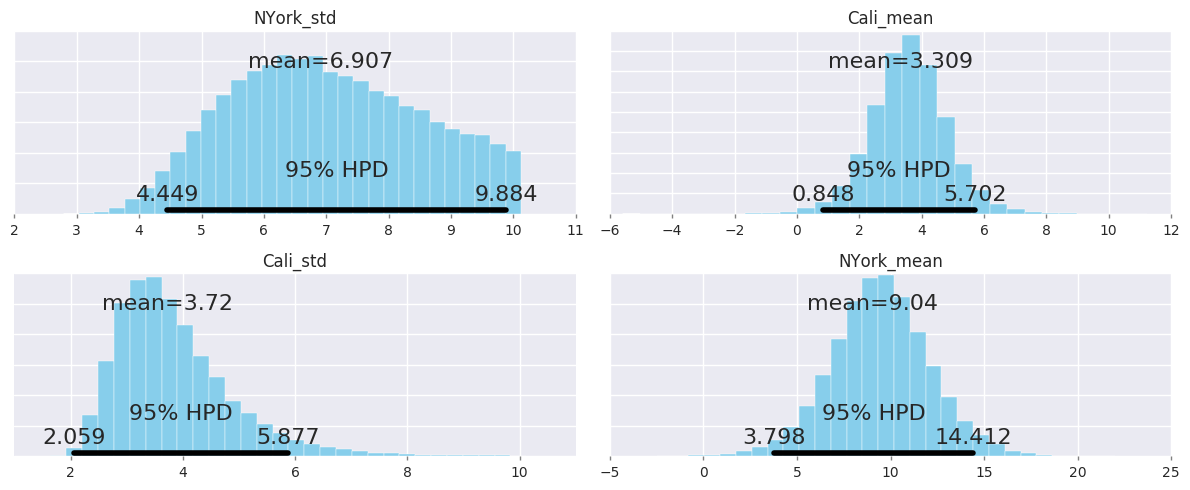

In [226]:
#plotting posteriors and result distributions
pm.plot_posterior(trace[3000:],
                  varnames=['NYork_mean', 'Cali_mean', 'NYork_std', 'Cali_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13c034a50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1305f5290>], dtype=object)

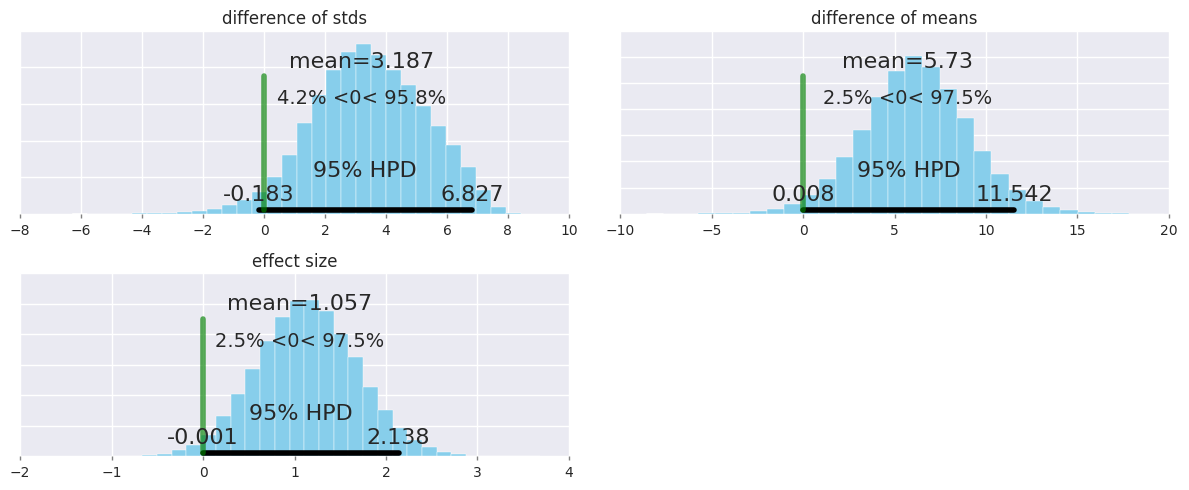

In [227]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [228]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.730            2.915            0.013            [0.008, 11.542]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.008          3.842          5.720          7.609          11.542


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  3.187            1.852            0.011            [-0.183, 6.827]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.543         1.946          3.180          4.505          6.595


effect size:

  Mean             SD               MC Error         95% HPD 

#### The results of my MCMC model conclude that the California and New York bombings are not statistically significantly different and therefore possibly belong to the same population.

# Imputing 1993

#### 1993 is missing in the dataset. I will impute 1993 through the use of linear regression. I am going to analyze the trends of terror attacks for each region to select a reasonable year range for the linear regressor. 

In [7]:
# column rename to match labels on graphs
df1.rename(columns= {'eventid' : 'North America'}, inplace = True)
df2.rename(columns= {'eventid' : 'Central America'}, inplace = True)
df3.rename(columns= {'eventid' : 'South America'}, inplace = True)
df4.rename(columns= {'eventid' : 'East Asia'}, inplace = True)
df5.rename(columns= {'eventid' : 'Southeast Asia'}, inplace = True)
df6.rename(columns= {'eventid' : 'South Asia'}, inplace = True)
df7.rename(columns= {'eventid' : 'Central Asia'}, inplace = True)
df8.rename(columns= {'eventid' : 'Western Europe'}, inplace = True)
df9.rename(columns= {'eventid' : 'Eastern Europe'}, inplace = True)
df10.rename(columns= {'eventid' : 'Middle East'}, inplace = True)
df11.rename(columns= {'eventid' : 'Sub-Saharan Africa'}, inplace = True)
df12.rename(columns= {'eventid' : 'Australasia'}, inplace = True)

/Users/Ikekram/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


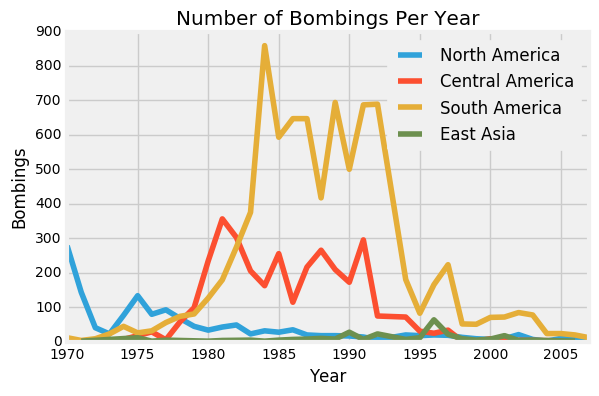

In [33]:

import matplotlib

%matplotlib inline
df1.groupby('iyear')['North America'].count().plot()
df2.groupby('iyear')['Central America'].count().plot()
df3.groupby('iyear')['South America'].count().plot()
df4.groupby('iyear')['East Asia'].count().plot()

plt.ylabel('Bombings')
plt.xlabel('Year')
plt.title('Number of Bombings Per Year')
plt.legend(loc='upper right')


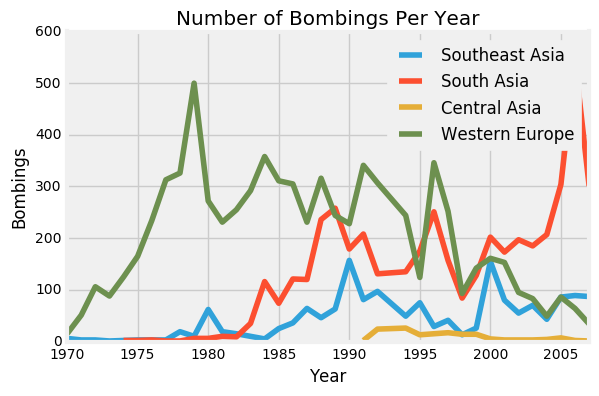

In [35]:
df5.groupby('iyear')['Southeast Asia'].count().plot()
df6.groupby('iyear')['South Asia'].count().plot()
df7.groupby('iyear')['Central Asia'].count().plot()
df8.groupby('iyear')['Western Europe'].count().plot()
plt.ylabel('Bombings')
plt.xlabel('Year')
plt.title('Number of Bombings Per Year')
plt.legend(loc='upper right')

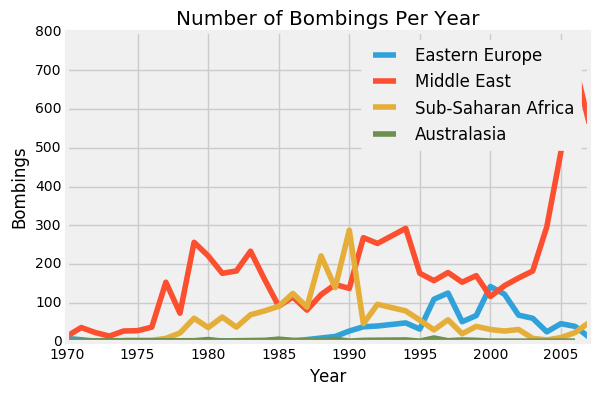

In [37]:
df9.groupby('iyear')['Eastern Europe'].count().plot()
df10.groupby('iyear')['Middle East'].count().plot()
df11.groupby('iyear')['Sub-Saharan Africa'].count().plot()
df12.groupby('iyear')['Australasia'].count().plot()
plt.ylabel('Bombings')
plt.xlabel('Year')
plt.title('Number of Bombings Per Year')
plt.legend(loc='upper right')

#### It appears the years 1991-1995 follow a similar trend in attacks for that year range. Will use these years in a linear regressor with number of attacks for that year as the feature.

In [12]:
df1y = df1[(df1.iyear > 1990)]
df1y = df1y[(df1y.iyear <= 1995)]

In [13]:
df1y.groupby('iyear').eventid.count()

iyear
1991    13
1992     5
1994    19
1995    17
Name: eventid, dtype: int64

In [14]:
df1y = df1y.groupby(["iyear"], as_index=False).count()
df1y

,iyear,eventid,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1991,13,13,13,0,13,0,13,13,13,...,3,3,3,2,13,13,13,13,13,0
1,1992,5,5,5,0,5,0,5,5,5,...,1,1,1,1,5,5,5,5,5,0
2,1994,19,19,19,0,19,0,19,19,19,...,3,3,3,3,19,19,19,19,19,4
3,1995,17,17,17,0,17,0,17,17,17,...,4,5,4,4,17,17,17,17,17,0


In [15]:
df2y = df2[(df2.iyear > 1990)]
df2y = df2y[(df2y.iyear <= 1995)]
df2y = df2y.groupby(["iyear"], as_index=False).count()

df3y = df3[(df3.iyear > 1990)]
df3y = df3y[(df3y.iyear <= 1995)]
df3y = df3y.groupby(["iyear"], as_index=False).count()

df4y = df4[(df4.iyear > 1990)]
df4y = df4y[(df4y.iyear <= 1995)]
df4y = df4y.groupby(["iyear"], as_index=False).count()

df5y = df5[(df5.iyear > 1990)]
df5y = df5y[(df5y.iyear <= 1995)]
df5y = df5y.groupby(["iyear"], as_index=False).count()

df6y = df6[(df6.iyear > 1990)]
df6y = df6y[(df6y.iyear <= 1995)]
df6y = df6y.groupby(["iyear"], as_index=False).count()

df7y = df7[(df7.iyear > 1990)]
df7y = df7y[(df7y.iyear <= 1995)]
df7y = df7y.groupby(["iyear"], as_index=False).count()

df8y = df8[(df8.iyear > 1990)]
df8y = df8y[(df8y.iyear <= 1995)]
df8y = df8y.groupby(["iyear"], as_index=False).count()

df9y = df9[(df9.iyear > 1990)]
df9y = df9y[(df9y.iyear <= 1995)]
df9y = df9y.groupby(["iyear"], as_index=False).count()

df10y = df10[(df10.iyear > 1990)]
df10y = df10y[(df10y.iyear <= 1995)]
df10y = df10y.groupby(["iyear"], as_index=False).count()

df11y = df11[(df11.iyear > 1990)]
df11y = df11y[(df11y.iyear <= 1995)]
df11y = df11y.groupby(["iyear"], as_index=False).count()

df12y = df12[(df12.iyear > 1990)]
df12y = df12y[(df12y.iyear <= 1995)]
df12y = df12y.groupby(["iyear"], as_index=False).count()




In [16]:
from sklearn import linear_model
X = df1y[['iyear']]
y = df1y[['eventid']]
lm = linear_model.LinearRegression()
model = lm.fit(X, y)
y_pred = model.predict(1993)
print y_pred

[[ 13.5]]


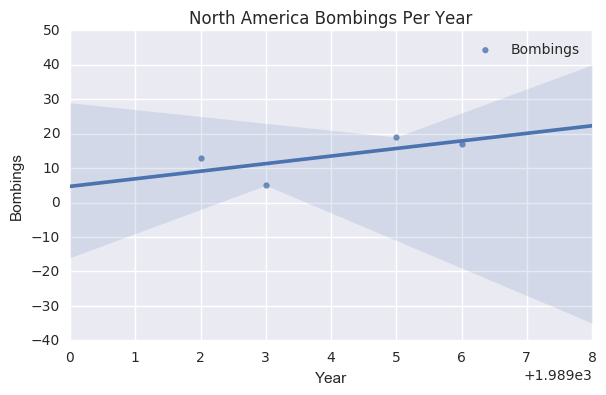

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.regplot(x= df1y.iyear, y=df1y.eventid, label = 'Bombings')
plt.legend(loc="best")
plt.ylabel('Bombings')
plt.xlabel('Year')
plt.title('North America Bombings Per Year')

In [19]:
#creating a function that inputs the df for that year, and fits it a linear regression model, predicts the amount of bombings and plots the line 
total = []
def bombings(dfyear):
    X = dfyear[['iyear']]
    y = dfyear[['eventid']]
    lm = linear_model.LinearRegression()
    model = lm.fit(X, y)
    y_pred = model.predict(1993)
    total.append(y_pred)
    print y_pred
    sns.regplot(x= dfyear.iyear, y=dfyear.eventid, label = 'Bombings')
    plt.legend(loc="best")
    plt.ylabel('Bombings')
    plt.xlabel('Year')
    plt.title('Number of Bombings Per Year')
    

[[ 13.5]]


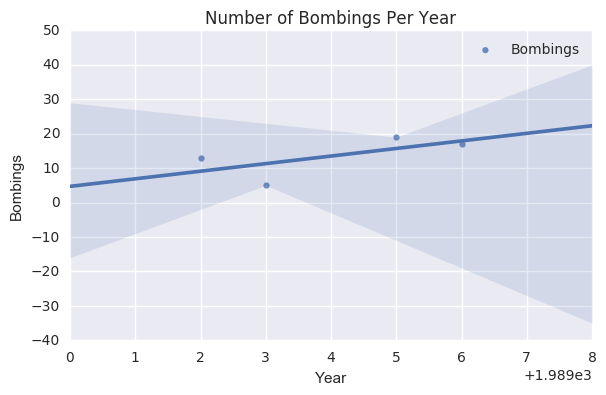

In [20]:
bombings(df1y)

[[ 117.5]]


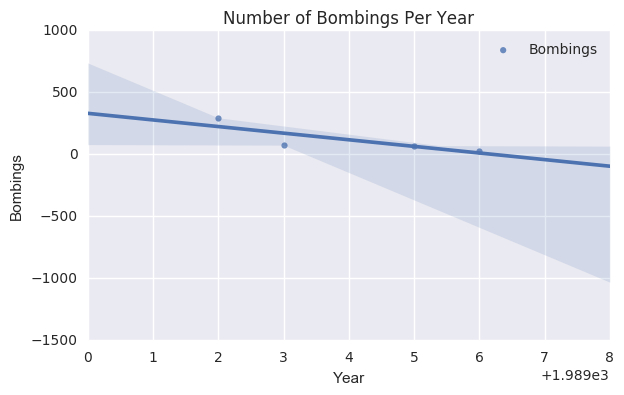

In [22]:
bombings(df2y)

[[ 409.5]]


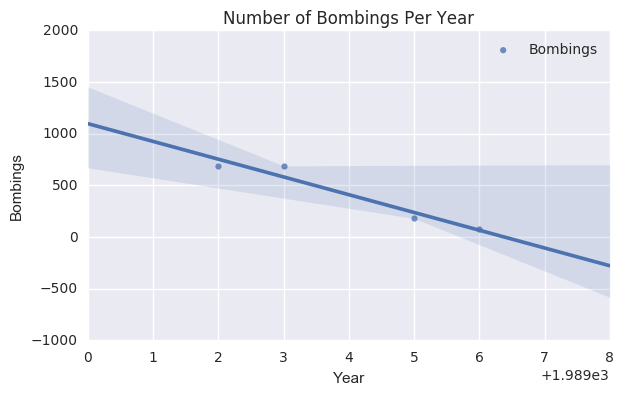

In [23]:
bombings(df3y)

[[ 11.25]]


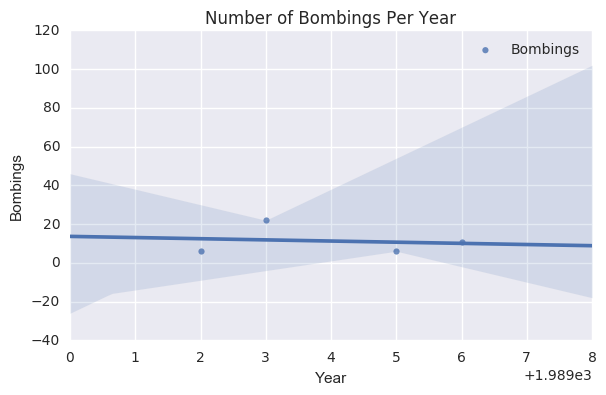

In [24]:
bombings(df4y)

[[ 75.5]]


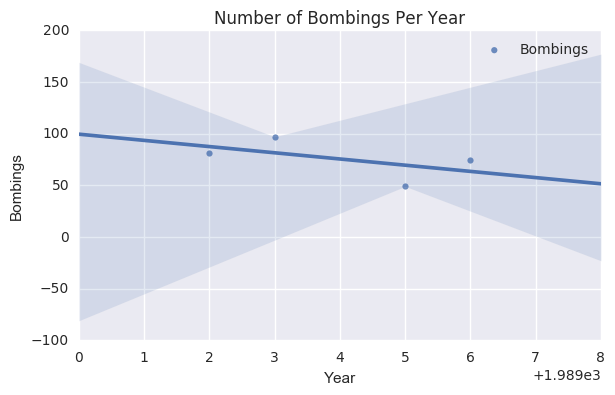

In [25]:
bombings(df5y)

[[ 162.25]]


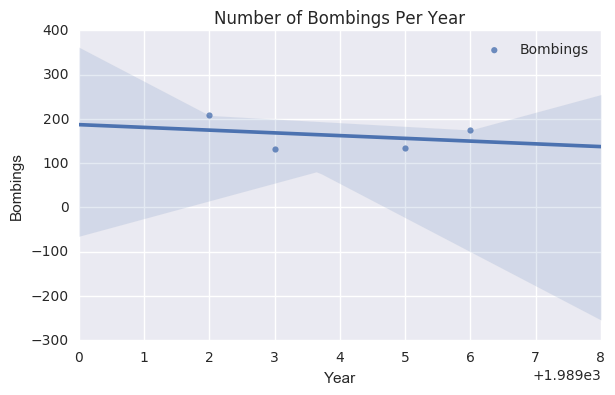

In [26]:
bombings(df6y)

[[ 16.25]]


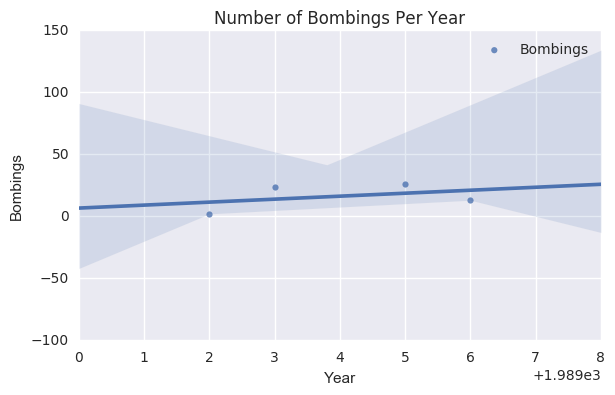

In [27]:
bombings(df7y)

[[ 254.]]


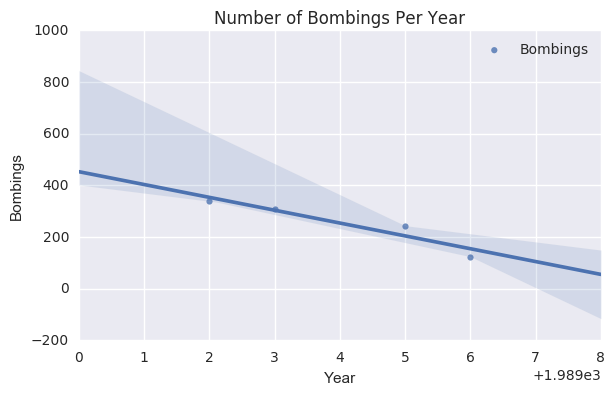

In [28]:
bombings(df8y)

[[ 39.5]]


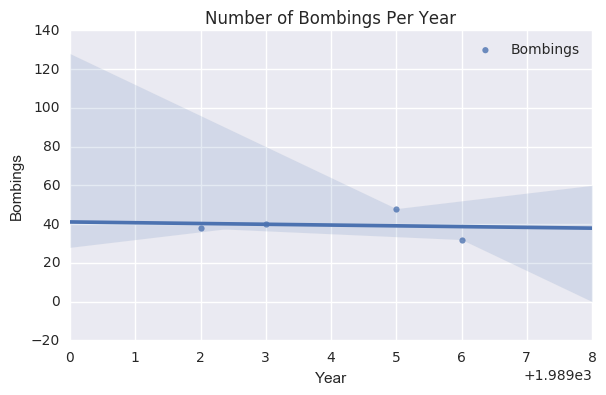

In [29]:
bombings(df9y)

[[ 247.25]]


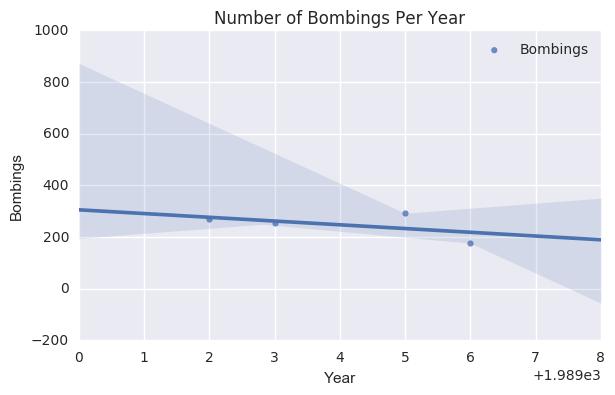

In [30]:
bombings(df10y)

[[ 69.]]


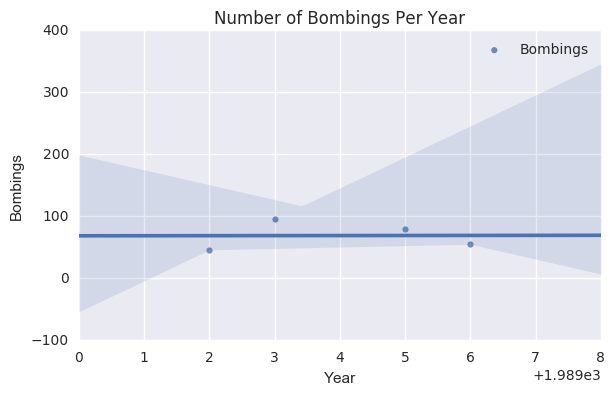

In [31]:
bombings(df11y)

[[ 2.76923077]]


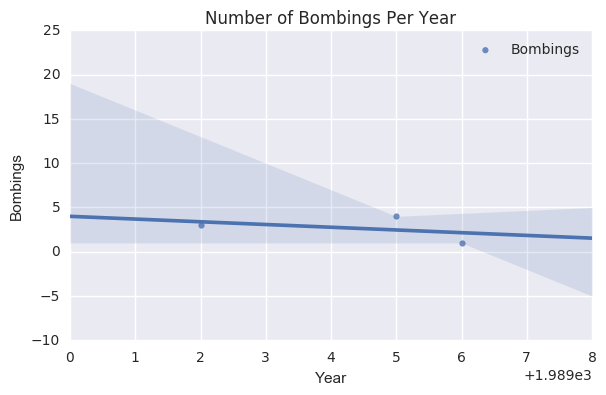

In [32]:
bombings(df12y)

In [34]:
sum(total)

array([[ 1418.26923077]])

#